In [1]:
import numpy as np

In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)

# theta1 = 4 and theta2 = 3

In [3]:
x_b = np.c_[np.ones((100,1)), x]
x_b
# x0 and x1 attributes

array([[1.        , 1.48584488],
       [1.        , 1.09826099],
       [1.        , 1.41333433],
       [1.        , 0.38393785],
       [1.        , 0.14537319],
       [1.        , 0.6511751 ],
       [1.        , 1.98028797],
       [1.        , 1.31035529],
       [1.        , 1.51190466],
       [1.        , 0.92889017],
       [1.        , 0.41180269],
       [1.        , 1.22999539],
       [1.        , 1.71450407],
       [1.        , 0.54913769],
       [1.        , 1.52468921],
       [1.        , 1.09894639],
       [1.        , 1.91937658],
       [1.        , 0.0022368 ],
       [1.        , 1.3015078 ],
       [1.        , 0.25144307],
       [1.        , 0.47505288],
       [1.        , 1.41786662],
       [1.        , 1.54032234],
       [1.        , 0.86863684],
       [1.        , 1.57679004],
       [1.        , 1.2327739 ],
       [1.        , 0.0181855 ],
       [1.        , 1.77774701],
       [1.        , 1.74749955],
       [1.        , 1.7145451 ],
       [1.

In [4]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [5]:
theta_best

# parameters are close to actual
# the noise we added made it impossible to recover the exact parameters of the original function

array([[4.47192718],
       [2.98675866]])

In [6]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
x_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 4.47192718],
       [10.44544451]])

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

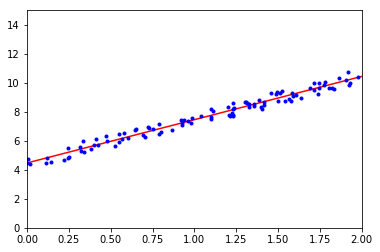

In [9]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_base.py:547: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(array([4.47192718]), array([[2.98675866]]))

In [11]:
y_pred = lin_reg.predict(x_new)
y_pred

array([[ 4.47192718],
       [10.44544451]])

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond = 1e-6)
theta_best_svd

array([[4.47192718],
       [2.98675866]])

In [13]:
np.linalg.pinv(x_b).dot(y)

array([[4.47192718],
       [2.98675866]])

### *Batch Gradient Descent*

In [14]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)- y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.47192718],
       [2.98675866]])

### *Stochastic Gradient Descent*

In [16]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [17]:
theta

array([[4.49229054],
       [2.98663055]])

### *Polynomial Regression*

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(X)
X[0]

array([2.47674641])

In [20]:
x_poly[0]

array([2.47674641, 6.13427276])

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

# original equation was 0.5x^2 + x + 2 + gaussian_noise
# predicted equation is 0.512x^2 + 1.032x + 1.9435

(array([2.05149149]), array([[0.96955865, 0.4594512 ]]))

### * Learning Curves*

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_error, val_error = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_error), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_error), "b-", linewidth = 3, label = "val")

Text(0.5, 1.0, 'learning curve for a linear model')

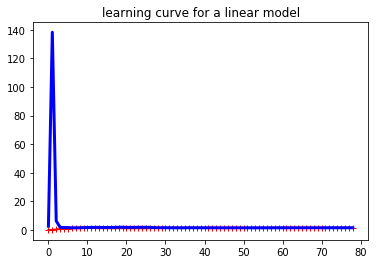

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.title("learning curve for a linear model")

Text(0.5, 1.0, 'learning curve for a 10 degree polynomial model')

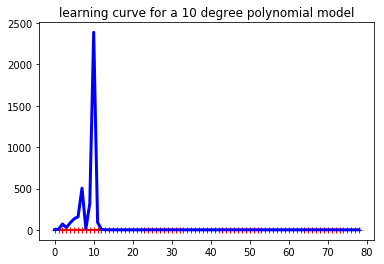

In [24]:
from sklearn.pipeline import Pipeline

polynomial_reg= Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_reg, X, y)
plt.title("learning curve for a 10 degree polynomial model")

### *Regularized Linear Models*

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.93287512]])

In [26]:
ridge_reg = Ridge(alpha = 1, solver = "sag", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.92632627]])

In [27]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.91064655])

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.89169236])

In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.89395119])

### *Early Stopping*

In [30]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 * X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [31]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scalar", StandardScaler())
])

X_train_poly_scaled = poly_features.fit_transform(X_train)
X_val_poly_scaled = poly_features.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                      penalty = None, learning_rate = "constant", eta0 = 0.0005)

min_val_error = float("inf")
best_model = None
best_epoch = None
epochs = 1000

for epoch in range(epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print(best_model, best_epoch)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True) 73


### *IRIS dataset*

In [32]:
from sklearn import datasets

In [33]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [51]:
X = iris["data"][:, 3:] # petal length
y = (iris["target"] == 2).astype(np.int)

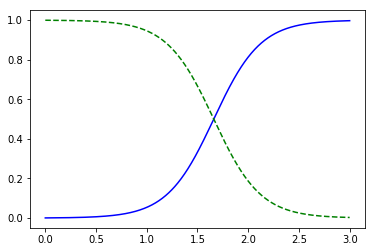

In [58]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1], "b-", label = "Virginica")
plt.plot(X_new, y_prob[:, 0], "g--", label = "Not Virginica")

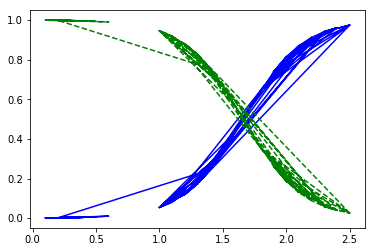

In [61]:
# X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X)
plt.plot(X, y_prob[:, 1], "b-", label = "Virginica")
plt.plot(X, y_prob[:, 0], "g--", label = "Not Virginica")

In [63]:
X_softmax = iris["data"][:, (2,3)] # petal width and petal length
y_softmax = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X_softmax, y_softmax)

LogisticRegression(C=10, multi_class='multinomial')

In [67]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
